In [13]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
import pickle
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from keras.regularizers import l2
from sklearn.metrics import mean_absolute_error, mean_squared_error




def calculate_and_log_training_time(modelname, start_time, end_time):
    training_duration = end_time - start_time
    # Print training duration in a human-readable format
    hours, rem = divmod(training_duration, 3600)
    minutes, seconds = divmod(rem, 60)
    
    filepath = modelname+"trainingtime.txt"
    with open(filepath, "w") as f:
        f.write(f"Training took {int(hours):02d}:{int(minutes):02d}:{seconds:02f} (hh:mm:ss).")



## runtime
def save_model_config_with_optimizer(model, modelname):
    filepath = modelname+"model_config.txt"
    with open(filepath, 'w') as f:
        # Save layer configurations
        for layer in model.layers:
            f.write(f"Layer: {layer.name}\n")
            f.write(f"Config: {layer.get_config()}\n\n")
        
        # Save optimizer configuration
        optimizer_config = model.optimizer.get_config()
        f.write("Optimizer Config:\n")
        f.write(str(optimizer_config))


def save_model(model, modelname):
    model.save(modelname+".keras")

def save_performance_metrics(history, modelname):
    filepath = modelname+'performance_metrics.csv'
    pd.DataFrame(history.history).to_csv(filepath)
    
    
        
def plot_loss_and_metric(history, metric_name='accuracy', model_name='model'):
    """
    Plots the training and validation loss, and a performance metric from the training history, and saves the plots
    with the model name as a prefix. This version explicitly uses Figures and Axes for better control.

    Parameters:
    - history: Return value from model.fit().
    - metric_name: Name of the performance metric to plot (e.g., 'accuracy', 'mae').
    - model_name: Name of the model, used as a prefix for saving plot images.
    """

    # First plot: Training & validation loss values
    fig, ax = plt.subplots(figsize=(14, 6))  # Explicitly create a Figure and Axes
    ax.plot(history.history['loss'], label='Train Loss')
    ax.plot(history.history['val_loss'], label='Validation Loss')
    ax.set_title('Model Loss')
    ax.set_ylabel('Loss')
    ax.set_xlabel('Epoch')
    ax.legend(loc='upper right')
    ax.grid(True)  # Adding grid explicitly
    loss_plot_filename = f'{model_name}_loss_plot.jpg'
    fig.savefig(loss_plot_filename)
    print(f"Loss plot saved as: {loss_plot_filename}")
    plt.close(fig)  # Close the figure

    # Second plot: Training & validation performance metric
    fig, ax = plt.subplots(figsize=(14, 6))  # Again, explicitly create a Figure and Axes for the metric plot
    ax.plot(history.history[metric_name], label=f'Train {metric_name.capitalize()}')
    ax.plot(history.history[f'val_{metric_name}'], label=f'Validation {metric_name.capitalize()}')
    ax.set_title(f'Model {metric_name.capitalize()}')
    ax.set_ylabel(metric_name.capitalize())
    ax.set_xlabel('Epoch')
    ax.legend(loc='upper left')
    ax.grid(True)  # Adding grid explicitly
    metric_plot_filename = f'{model_name}_{metric_name}_plot.jpg'
    fig.savefig(metric_plot_filename)
    print(f"Metric plot saved as: {metric_plot_filename}")
    plt.close(fig)  # Close the figure to free up memory


def save_model_and_config_and_metrics(model, history, modelname = "model"):
    save_model_config_with_optimizer(model, modelname = modelname)
    save_model(model, modelname = modelname)
    save_performance_metrics(history, modelname = modelname)
    plot_loss_and_metric(history, metric_name='mae', model_name=modelname)

In [14]:
import os

def calculate_and_log_training_time(modelname, start_time, end_time):
    training_duration = end_time - start_time
    hours, rem = divmod(training_duration, 3600)
    minutes, seconds = divmod(rem, 60)
    
    model_dir = modelname
    if not os.path.exists(model_dir):
        os.makedirs(model_dir)
    
    filepath = os.path.join(model_dir, "trainingtime.txt")
    with open(filepath, "w") as f:
        f.write(f"Training took {int(hours):02d}:{int(minutes):02d}:{seconds:02f} (hh:mm:ss).")

def save_model_config_with_optimizer(model, modelname):
    model_dir = modelname
    if not os.path.exists(model_dir):
        os.makedirs(model_dir)
    
    filepath = os.path.join(model_dir, "model_config.txt")
    with open(filepath, 'w') as f:
        for layer in model.layers:
            f.write(f"Layer: {layer.name}\n")
            f.write(f"Config: {layer.get_config()}\n\n")
        
        optimizer_config = model.optimizer.get_config()
        f.write("Optimizer Config:\n")
        f.write(str(optimizer_config))

def save_model(model, modelname):
    model_dir = modelname
    if not os.path.exists(model_dir):
        os.makedirs(model_dir)
    
    model_path = os.path.join(model_dir, modelname + ".keras")
    model.save(model_path)

def save_performance_metrics(history, modelname):
    model_dir = modelname
    if not os.path.exists(model_dir):
        os.makedirs(model_dir)
    
    filepath = os.path.join(model_dir, 'performance_metrics.csv')
    pd.DataFrame(history.history).to_csv(filepath)

def plot_loss_and_metric(history, metric_name='accuracy', model_name='model'):
    model_dir = model_name
    if not os.path.exists(model_dir):
        os.makedirs(model_dir)
    
    # First plot: Training & validation loss
    fig, ax = plt.subplots(figsize=(14, 6))
    ax.plot(history.history['loss'], label='Train Loss')
    ax.plot(history.history['val_loss'], label='Validation Loss')
    ax.set_title('Model Loss')
    ax.set_ylabel('Loss')
    ax.set_xlabel('Epoch')
    ax.legend(loc='upper right')
    ax.grid(True)
    loss_plot_filename = os.path.join(model_dir, f'{model_name}_loss_plot.jpg')
    fig.savefig(loss_plot_filename)
    print(f"Loss plot saved as: {loss_plot_filename}")
    plt.close(fig)
    
    # Second plot: Training & validation metric
    fig, ax = plt.subplots(figsize=(14, 6))
    ax.plot(history.history[metric_name], label=f'Train {metric_name.capitalize()}')
    ax.plot(history.history[f'val_{metric_name}'], label=f'Validation {metric_name.capitalize()}')
    ax.set_title(f'Model {metric_name.capitalize()}')
    ax.set_ylabel(metric_name.capitalize())
    ax.set_xlabel('Epoch')
    ax.legend(loc='upper left')
    ax.grid(True)
    metric_plot_filename = os.path.join(model_dir, f'{model_name}_{metric_name}_plot.jpg')
    fig.savefig(metric_plot_filename)
    print(f"Metric plot saved as: {metric_plot_filename}")
    plt.close(fig)

def save_model_and_config_and_metrics(model, history, modelname = "model"):
    save_model_config_with_optimizer(model, modelname = modelname)
    save_model(model, modelname = modelname)
    save_performance_metrics(history, modelname = modelname)
    plot_loss_and_metric(history, metric_name='mae', model_name= modelname)

### RGB DataImport

In [7]:
path = "C:/Users/marij/Documents/Universiteit_local/Master_Year1/DeepLearning/Part1_Processed_RGB.pkl"
# Open the pickle file in binary mode
with open(path, 'rb') as file:
    # Load the content of the file into a variable
    RGB_data = pickle.load(file)

In [3]:
sampled_RGB_data = RGB_data.sample(n=1000, random_state = 2001)
y = sampled_RGB_data['Age'].values
X = sampled_RGB_data['Image'].values
X = np.stack(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
X_train

array([[[[0.03921569, 0.0627451 , 0.08235294],
         [0.03529412, 0.05882353, 0.07843138],
         [0.03137255, 0.05490196, 0.08235294],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.03529412, 0.05882353, 0.07843138],
         [0.03529412, 0.05882353, 0.07843138],
         [0.03137255, 0.05490196, 0.08235294],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.03137255, 0.05490196, 0.07450981],
         [0.03137255, 0.05490196, 0.07450981],
         [0.02745098, 0.05098039, 0.07843138],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        ...,

        [[0.88235295, 0.827451  , 0.87058824],
         [0.8901961 , 0.8352941 , 0.8784314 ]

In [5]:
X_train.shape

(800, 256, 256, 3)

### Model 1

In [7]:
# Define the model
model = tf.keras.Sequential([
    tf.keras.Input(shape=(256, 256, 3)),  # Define the input shape her
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3])),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
# Capture start time
start_time = time.time()
# fit the model
history = model.fit(X, y, epochs=12, validation_split=0.2)
# Capture end time and calculate duration
end_time = time.time()
modelname = '1000RGBCNN1'
calculate_and_log_training_time(modelname = modelname, start_time = start_time, end_time = end_time)
save_model_and_config_and_metrics(model = model, history = history,  modelname = modelname)


c:\users\marij\appdata\local\programs\python\python39\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/12
25/25 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - loss: 1578.6344 - mae: 29.0627 - val_loss: 721.9092 - val_mae: 22.5477
Epoch 2/12
25/25 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - loss: 746.1515 - mae: 23.1378 - val_loss: 672.0518 - val_mae: 21.8352
Epoch 3/12
25/25 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - loss: 713.4332 - mae: 23.0096 - val_loss: 641.6840 - val_mae: 21.3700
Epoch 4/12
25/25 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - loss: 664.6849 - mae: 22.0956 - val_loss: 632.1837 - val_mae: 21.2510
Epoch 5/12
25/25 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - loss: 627.9723 - mae: 21.1087 - val_loss: 473.8699 - val_mae: 18.0297
Epoch 6/12
25/25 ━━━━━━━━━━━━━━━━━━━━ 25s 996ms/step - loss: 498.9251 - mae: 18.7428 - val_loss: 435.4593 - val_mae: 17.7776
Epoch 7/12
25/25 ━━━━━━━━━━━━━━━━━━━━ 23s 918ms/step - loss: 465.8896 - mae: 17.5642 - val_loss: 421.1558 - val_mae: 17.1726
Epoch 8/12
25/25 ━━━━━━━━━━━━━━━━━━━━ 23s 938ms/step - loss: 346.4597 - mae: 14.7524 - val_loss: 336.9038 - val_mae: 14.2391
Epoch 9/12
25/

### Model 2

In [8]:
# Define the model
model = tf.keras.Sequential([
    tf.keras.Input(shape=(256, 256, 3)),  # Define the input shape her
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3])),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
# Capture start time
start_time = time.time()
# fit the model
history = model.fit(X, y, epochs=12, validation_split=0.2)
# Capture end time and calculate duration
end_time = time.time()

modelname = '1000RGBCNN2'
calculate_and_log_training_time(modelname = modelname, start_time = start_time, end_time = end_time)
save_model_and_config_and_metrics(model = model, history = history,  modelname = modelname)

c:\users\marij\appdata\local\programs\python\python39\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/12
25/25 ━━━━━━━━━━━━━━━━━━━━ 24s 903ms/step - loss: 878.2673 - mae: 24.3488 - val_loss: 544.3779 - val_mae: 19.7763
Epoch 2/12
25/25 ━━━━━━━━━━━━━━━━━━━━ 22s 893ms/step - loss: 574.0205 - mae: 20.2303 - val_loss: 474.6278 - val_mae: 18.4267
Epoch 3/12
25/25 ━━━━━━━━━━━━━━━━━━━━ 22s 899ms/step - loss: 553.3589 - mae: 19.3463 - val_loss: 422.5993 - val_mae: 16.6531
Epoch 4/12
25/25 ━━━━━━━━━━━━━━━━━━━━ 23s 932ms/step - loss: 528.6119 - mae: 18.0199 - val_loss: 428.5474 - val_mae: 17.0615
Epoch 5/12
25/25 ━━━━━━━━━━━━━━━━━━━━ 23s 927ms/step - loss: 394.9439 - mae: 15.3430 - val_loss: 353.5254 - val_mae: 14.6381
Epoch 6/12
25/25 ━━━━━━━━━━━━━━━━━━━━ 23s 907ms/step - loss: 292.5572 - mae: 12.8835 - val_loss: 360.6035 - val_mae: 15.0033
Epoch 7/12
25/25 ━━━━━━━━━━━━━━━━━━━━ 23s 913ms/step - loss: 292.1963 - mae: 12.9336 - val_loss: 358.5579 - val_mae: 14.6779
Epoch 8/12
25/25 ━━━━━━━━━━━━━━━━━━━━ 23s 926ms/step - loss: 212.9305 - mae: 10.6878 - val_loss: 340.9707 - val_mae: 14.3237


### Model 3

In [9]:
# Define the model
model = tf.keras.Sequential([
    tf.keras.Input(shape=(256, 256, 3)),  # Define the input shape her
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3])),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
# Capture start time
start_time = time.time()
# fit the model
history = model.fit(X, y, epochs=12, validation_split=0.2)
# Capture end time and calculate duration
end_time = time.time()

modelname = '1000RGBCNN3'
calculate_and_log_training_time(modelname = modelname, start_time = start_time, end_time = end_time)
save_model_and_config_and_metrics(model = model, history = history,  modelname = modelname)

c:\users\marij\appdata\local\programs\python\python39\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/12
25/25 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - loss: 951.5848 - mae: 25.4581 - val_loss: 575.1730 - val_mae: 20.2758
Epoch 2/12
25/25 ━━━━━━━━━━━━━━━━━━━━ 23s 931ms/step - loss: 693.9902 - mae: 22.2039 - val_loss: 500.1079 - val_mae: 18.6416
Epoch 3/12
25/25 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - loss: 566.1277 - mae: 19.3682 - val_loss: 524.0504 - val_mae: 19.2451
Epoch 4/12
25/25 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - loss: 583.6495 - mae: 18.9100 - val_loss: 405.6701 - val_mae: 16.6503
Epoch 5/12
25/25 ━━━━━━━━━━━━━━━━━━━━ 24s 945ms/step - loss: 364.4417 - mae: 14.9667 - val_loss: 422.6143 - val_mae: 16.4496
Epoch 6/12
25/25 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - loss: 287.9714 - mae: 13.1479 - val_loss: 341.7905 - val_mae: 14.2121
Epoch 7/12
25/25 ━━━━━━━━━━━━━━━━━━━━ 24s 944ms/step - loss: 268.8148 - mae: 12.1881 - val_loss: 371.3958 - val_mae: 15.1594
Epoch 8/12
25/25 ━━━━━━━━━━━━━━━━━━━━ 23s 939ms/step - loss: 192.9655 - mae: 10.6621 - val_loss: 333.3112 - val_mae: 14.0301
Epoch 9/12
2

### Increase sample size by 1000
### Model 1

In [10]:
sampled_RGB_data = RGB_data.sample(n=2000, random_state = 2001)
y = sampled_RGB_data['Age'].values
X = sampled_RGB_data['Image'].values
X = np.stack(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Define the model
model = tf.keras.Sequential([
    tf.keras.Input(shape=(256, 256, 3)),  # Define the input shape her
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3])),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
# Capture start time
start_time = time.time()
# fit the model
history = model.fit(X, y, epochs=12, validation_split=0.2)
# Capture end time and calculate duration
end_time = time.time()

modelname = "2000RBGCNN1"
calculate_and_log_training_time(modelname = modelname, start_time = start_time, end_time = end_time)
save_model_and_config_and_metrics(model = model, history = history,  modelname = modelname)

c:\users\marij\appdata\local\programs\python\python39\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/12
50/50 ━━━━━━━━━━━━━━━━━━━━ 62s 1s/step - loss: 1352.4658 - mae: 27.8576 - val_loss: 681.5572 - val_mae: 20.7425
Epoch 2/12
50/50 ━━━━━━━━━━━━━━━━━━━━ 48s 957ms/step - loss: 664.1737 - mae: 21.5744 - val_loss: 605.3840 - val_mae: 20.1337
Epoch 3/12
50/50 ━━━━━━━━━━━━━━━━━━━━ 53s 1s/step - loss: 539.0345 - mae: 19.3188 - val_loss: 452.4469 - val_mae: 16.9213
Epoch 4/12
50/50 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step - loss: 419.8944 - mae: 16.2456 - val_loss: 412.6884 - val_mae: 15.5035
Epoch 5/12
50/50 ━━━━━━━━━━━━━━━━━━━━ 46s 923ms/step - loss: 344.9446 - mae: 14.2759 - val_loss: 388.0883 - val_mae: 14.4851
Epoch 6/12
50/50 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step - loss: 277.7482 - mae: 12.3376 - val_loss: 420.1651 - val_mae: 14.2866
Epoch 7/12
50/50 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - loss: 224.2502 - mae: 10.9087 - val_loss: 390.4711 - val_mae: 15.0717
Epoch 8/12
50/50 ━━━━━━━━━━━━━━━━━━━━ 80s 986ms/step - loss: 214.0329 - mae: 11.0337 - val_loss: 371.7104 - val_mae: 13.2729
Epoch 9/12
50/

### Model 2

In [13]:
# Define the model
model = tf.keras.Sequential([
    tf.keras.Input(shape=(256, 256, 3)),  # Define the input shape her
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3])),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
# Capture start time
start_time = time.time()
# fit the model
history = model.fit(X, y, epochs=12, validation_split=0.2)
# Capture end time and calculate duration
end_time = time.time()

modelname = "2000RBGCNN2"
calculate_and_log_training_time(modelname = modelname, start_time = start_time, end_time = end_time)
save_model_and_config_and_metrics(model = model, history = history,  modelname = modelname)

c:\users\marij\appdata\local\programs\python\python39\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/12
50/50 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step - loss: 892.3332 - mae: 24.1551 - val_loss: 635.8647 - val_mae: 20.1902
Epoch 2/12
50/50 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - loss: 605.3712 - mae: 20.4546 - val_loss: 564.1740 - val_mae: 18.0135
Epoch 3/12
50/50 ━━━━━━━━━━━━━━━━━━━━ 53s 1s/step - loss: 483.4496 - mae: 17.7392 - val_loss: 462.6607 - val_mae: 16.9905
Epoch 4/12
50/50 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - loss: 392.3832 - mae: 15.6108 - val_loss: 469.8961 - val_mae: 14.7505
Epoch 5/12
50/50 ━━━━━━━━━━━━━━━━━━━━ 49s 979ms/step - loss: 338.9619 - mae: 13.5303 - val_loss: 411.6151 - val_mae: 13.5428
Epoch 6/12
50/50 ━━━━━━━━━━━━━━━━━━━━ 49s 973ms/step - loss: 279.9233 - mae: 12.3027 - val_loss: 357.3709 - val_mae: 13.2459
Epoch 7/12
50/50 ━━━━━━━━━━━━━━━━━━━━ 47s 940ms/step - loss: 218.8492 - mae: 10.9469 - val_loss: 460.6498 - val_mae: 14.0682
Epoch 8/12
50/50 ━━━━━━━━━━━━━━━━━━━━ 47s 943ms/step - loss: 227.8076 - mae: 10.8165 - val_loss: 351.0320 - val_mae: 12.7723
Epoch 9/12
5

### Model 3

In [14]:
# Define the model
model = tf.keras.Sequential([
    tf.keras.Input(shape=(256, 256, 3)),  # Define the input shape her
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3])),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
# Capture start time
start_time = time.time()
# fit the model
history = model.fit(X, y, epochs=12, validation_split=0.2)
# Capture end time and calculate duration
end_time = time.time()

modelname = "2000RBGCNN3"
calculate_and_log_training_time(modelname = modelname, start_time = start_time, end_time = end_time)
save_model_and_config_and_metrics(model = model, history = history,  modelname = modelname)

c:\users\marij\appdata\local\programs\python\python39\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/12
50/50 ━━━━━━━━━━━━━━━━━━━━ 49s 953ms/step - loss: 835.8069 - mae: 23.2301 - val_loss: 716.6864 - val_mae: 22.9279
Epoch 2/12
50/50 ━━━━━━━━━━━━━━━━━━━━ 47s 934ms/step - loss: 666.2056 - mae: 20.8799 - val_loss: 743.5247 - val_mae: 23.9762
Epoch 3/12
50/50 ━━━━━━━━━━━━━━━━━━━━ 46s 917ms/step - loss: 592.9092 - mae: 19.6559 - val_loss: 492.4164 - val_mae: 16.4726
Epoch 4/12
50/50 ━━━━━━━━━━━━━━━━━━━━ 48s 955ms/step - loss: 416.6466 - mae: 15.7377 - val_loss: 437.9920 - val_mae: 17.0020
Epoch 5/12
50/50 ━━━━━━━━━━━━━━━━━━━━ 47s 938ms/step - loss: 364.8119 - mae: 14.5042 - val_loss: 401.2849 - val_mae: 13.8667
Epoch 6/12
50/50 ━━━━━━━━━━━━━━━━━━━━ 48s 950ms/step - loss: 308.6489 - mae: 12.8515 - val_loss: 407.8839 - val_mae: 13.6539
Epoch 7/12
50/50 ━━━━━━━━━━━━━━━━━━━━ 47s 933ms/step - loss: 247.1481 - mae: 11.1844 - val_loss: 415.5869 - val_mae: 15.7792
Epoch 8/12
50/50 ━━━━━━━━━━━━━━━━━━━━ 47s 931ms/step - loss: 193.5813 - mae: 10.1273 - val_loss: 367.3989 - val_mae: 13.3972


## Increase the sample size to 4000

In [15]:
sampled_RGB_data = RGB_data.sample(n=4000, random_state = 2001)
y = sampled_RGB_data['Age'].values
X = sampled_RGB_data['Image'].values
X = np.stack(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model 1

In [16]:
# Define the model
model = tf.keras.Sequential([
    tf.keras.Input(shape=(256, 256, 3)),  # Define the input shape her
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3])),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
# Capture start time
start_time = time.time()
# fit the model
history = model.fit(X, y, epochs=12, validation_split=0.2)
# Capture end time and calculate duration
end_time = time.time()

modelname = "4000RBGCNN1"
calculate_and_log_training_time(modelname = modelname, start_time = start_time, end_time = end_time)
save_model_and_config_and_metrics(model = model, history = history,  modelname = modelname)

c:\users\marij\appdata\local\programs\python\python39\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/12
100/100 ━━━━━━━━━━━━━━━━━━━━ 105s 989ms/step - loss: 991.3536 - mae: 24.6667 - val_loss: 514.7605 - val_mae: 18.9749
Epoch 2/12
100/100 ━━━━━━━━━━━━━━━━━━━━ 95s 946ms/step - loss: 496.5368 - mae: 17.8858 - val_loss: 414.2482 - val_mae: 15.1277
Epoch 3/12
100/100 ━━━━━━━━━━━━━━━━━━━━ 94s 944ms/step - loss: 390.2432 - mae: 15.1843 - val_loss: 524.0635 - val_mae: 16.3541
Epoch 4/12
100/100 ━━━━━━━━━━━━━━━━━━━━ 94s 936ms/step - loss: 323.8169 - mae: 13.5245 - val_loss: 370.1380 - val_mae: 14.7197
Epoch 5/12
100/100 ━━━━━━━━━━━━━━━━━━━━ 94s 935ms/step - loss: 273.8566 - mae: 12.3434 - val_loss: 370.2566 - val_mae: 13.6792
Epoch 6/12
100/100 ━━━━━━━━━━━━━━━━━━━━ 90s 903ms/step - loss: 216.5243 - mae: 10.9488 - val_loss: 380.5861 - val_mae: 14.7274
Epoch 7/12
100/100 ━━━━━━━━━━━━━━━━━━━━ 91s 915ms/step - loss: 179.1146 - mae: 9.8772 - val_loss: 366.0035 - val_mae: 14.1919
Epoch 8/12
100/100 ━━━━━━━━━━━━━━━━━━━━ 92s 918ms/step - loss: 160.2883 - mae: 9.1705 - val_loss: 362.2559 - va

In [17]:
# Define the model
model = tf.keras.Sequential([
    tf.keras.Input(shape=(256, 256, 3)),  # Define the input shape her
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3])),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
# Capture start time
start_time = time.time()
# fit the model
history = model.fit(X, y, epochs=12, validation_split=0.2)
# Capture end time and calculate duration
end_time = time.time()

modelname = "4000RBGCNN2"
calculate_and_log_training_time(modelname = modelname, start_time = start_time, end_time = end_time)
save_model_and_config_and_metrics(model = model, history = history,  modelname = modelname)

c:\users\marij\appdata\local\programs\python\python39\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/12
100/100 ━━━━━━━━━━━━━━━━━━━━ 100s 977ms/step - loss: 732.6415 - mae: 21.8682 - val_loss: 527.8630 - val_mae: 17.8196
Epoch 2/12
100/100 ━━━━━━━━━━━━━━━━━━━━ 94s 936ms/step - loss: 459.4997 - mae: 16.5905 - val_loss: 403.9205 - val_mae: 15.5603
Epoch 3/12
100/100 ━━━━━━━━━━━━━━━━━━━━ 94s 936ms/step - loss: 359.0526 - mae: 14.3414 - val_loss: 397.2345 - val_mae: 14.2997
Epoch 4/12
100/100 ━━━━━━━━━━━━━━━━━━━━ 95s 950ms/step - loss: 290.7215 - mae: 12.6314 - val_loss: 359.8949 - val_mae: 14.0218
Epoch 5/12
100/100 ━━━━━━━━━━━━━━━━━━━━ 93s 929ms/step - loss: 247.8128 - mae: 11.4180 - val_loss: 348.6389 - val_mae: 13.9131
Epoch 6/12
100/100 ━━━━━━━━━━━━━━━━━━━━ 93s 926ms/step - loss: 218.7290 - mae: 10.8563 - val_loss: 349.0015 - val_mae: 12.8452
Epoch 7/12
100/100 ━━━━━━━━━━━━━━━━━━━━ 93s 934ms/step - loss: 174.4243 - mae: 9.5561 - val_loss: 332.2126 - val_mae: 13.4407
Epoch 8/12
100/100 ━━━━━━━━━━━━━━━━━━━━ 93s 931ms/step - loss: 140.1494 - mae: 8.4458 - val_loss: 382.3600 - va

## Model 3

In [18]:
# Define the model
model = tf.keras.Sequential([
    tf.keras.Input(shape=(256, 256, 3)),  # Define the input shape her
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3])),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
# Capture start time
start_time = time.time()
# fit the model
history = model.fit(X, y, epochs=12, validation_split=0.2)
# Capture end time and calculate duration
end_time = time.time()

modelname = "4000RBGCNN3"
calculate_and_log_training_time(modelname = modelname, start_time = start_time, end_time = end_time)
save_model_and_config_and_metrics(model = model, history = history,  modelname = modelname)

c:\users\marij\appdata\local\programs\python\python39\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/12
100/100 ━━━━━━━━━━━━━━━━━━━━ 106s 998ms/step - loss: 766.5151 - mae: 22.2644 - val_loss: 578.5801 - val_mae: 20.5053
Epoch 2/12
100/100 ━━━━━━━━━━━━━━━━━━━━ 109s 1s/step - loss: 485.5310 - mae: 17.4619 - val_loss: 532.5429 - val_mae: 18.9640
Epoch 3/12
100/100 ━━━━━━━━━━━━━━━━━━━━ 126s 1s/step - loss: 397.8521 - mae: 15.2034 - val_loss: 398.5607 - val_mae: 13.6079
Epoch 4/12
100/100 ━━━━━━━━━━━━━━━━━━━━ 128s 1s/step - loss: 308.1802 - mae: 12.5628 - val_loss: 377.7584 - val_mae: 14.2541
Epoch 5/12
100/100 ━━━━━━━━━━━━━━━━━━━━ 121s 1s/step - loss: 233.3449 - mae: 11.2184 - val_loss: 369.1147 - val_mae: 13.0186
Epoch 6/12
100/100 ━━━━━━━━━━━━━━━━━━━━ 119s 1s/step - loss: 224.4783 - mae: 10.5997 - val_loss: 384.3371 - val_mae: 14.2378
Epoch 7/12
100/100 ━━━━━━━━━━━━━━━━━━━━ 125s 1s/step - loss: 162.5322 - mae: 9.0716 - val_loss: 343.0667 - val_mae: 12.6385
Epoch 8/12
100/100 ━━━━━━━━━━━━━━━━━━━━ 122s 1s/step - loss: 119.7447 - mae: 7.5574 - val_loss: 333.5570 - val_mae: 12.6378

## Increase the sample size to 8000
Does not work on my laptop

In [5]:
sampled_RGB_data = RGB_data.sample(n=8000, random_state = 2001)
y = sampled_RGB_data['Age'].values
X = sampled_RGB_data['Image'].values
X = np.stack(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model 1

In [6]:
# Define the model
model = tf.keras.Sequential([
    tf.keras.Input(shape=(256, 256, 3)),  # Define the input shape her
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3])),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
# Capture start time
start_time = time.time()
# fit the model
history = model.fit(X, y, epochs=12, validation_split=0.2)
# Capture end time and calculate duration
end_time = time.time()
calculate_and_log_training_time(modelname = "8000RBGCNN1", start_time = start_time, end_time = end_time)
save_model_and_config_and_metrics(model = model, history = history,  modelname = "8000RBGCNN1")

c:\users\marij\appdata\local\programs\python\python39\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/12
200/200 ━━━━━━━━━━━━━━━━━━━━ 280s 1s/step - loss: 764.2905 - mae: 22.0852 - val_loss: 529.3718 - val_mae: 17.1311
Epoch 2/12
200/200 ━━━━━━━━━━━━━━━━━━━━ 197s 987ms/step - loss: 411.7383 - mae: 15.5960 - val_loss: 415.7279 - val_mae: 14.8350
Epoch 3/12
200/200 ━━━━━━━━━━━━━━━━━━━━ 194s 968ms/step - loss: 318.2961 - mae: 13.1688 - val_loss: 364.0879 - val_mae: 14.4489
Epoch 4/12
200/200 ━━━━━━━━━━━━━━━━━━━━ 192s 961ms/step - loss: 276.7233 - mae: 12.3170 - val_loss: 354.0480 - val_mae: 14.2732
Epoch 5/12
200/200 ━━━━━━━━━━━━━━━━━━━━ 194s 972ms/step - loss: 223.0099 - mae: 11.0991 - val_loss: 342.6869 - val_mae: 14.0939
Epoch 6/12
200/200 ━━━━━━━━━━━━━━━━━━━━ 191s 956ms/step - loss: 201.6536 - mae: 10.3482 - val_loss: 321.1465 - val_mae: 12.5509
Epoch 7/12
200/200 ━━━━━━━━━━━━━━━━━━━━ 191s 955ms/step - loss: 158.5811 - mae: 9.1159 - val_loss: 314.3019 - val_mae: 12.7770
Epoch 8/12
200/200 ━━━━━━━━━━━━━━━━━━━━ 191s 956ms/step - loss: 129.8958 - mae: 8.1590 - val_loss: 324.1300 

## 8k data

In [7]:
# Define the model
model = tf.keras.Sequential([
    tf.keras.Input(shape=(256, 256, 3)),  # Define the input shape her
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3])),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),  # Dropout before the final Dense layer
    tf.keras.layers.Dense(1, activation='linear')
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
# Capture start time
start_time = time.time()
# fit the model
history = model.fit(X, y, epochs=12, validation_split=0.2)
# Capture end time and calculate duration
end_time = time.time()
modelname ="8000RBGCNN3conv"
calculate_and_log_training_time(modelname = modelname, start_time = start_time, end_time = end_time)
save_model_and_config_and_metrics(model = model, history = history,  modelname = modelname)

c:\users\marij\appdata\local\programs\python\python39\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/12
200/200 ━━━━━━━━━━━━━━━━━━━━ 255s 1s/step - loss: 779.5382 - mae: 22.2890 - val_loss: 479.2444 - val_mae: 18.4401
Epoch 2/12
200/200 ━━━━━━━━━━━━━━━━━━━━ 230s 1s/step - loss: 447.2285 - mae: 16.5650 - val_loss: 419.9832 - val_mae: 15.4188
Epoch 3/12
200/200 ━━━━━━━━━━━━━━━━━━━━ 227s 1s/step - loss: 380.5835 - mae: 14.8018 - val_loss: 377.1327 - val_mae: 15.2627
Epoch 4/12
200/200 ━━━━━━━━━━━━━━━━━━━━ 226s 1s/step - loss: 344.3775 - mae: 13.8417 - val_loss: 355.5616 - val_mae: 14.7070
Epoch 5/12
200/200 ━━━━━━━━━━━━━━━━━━━━ 227s 1s/step - loss: 303.5579 - mae: 12.9411 - val_loss: 336.9040 - val_mae: 13.0943
Epoch 6/12
200/200 ━━━━━━━━━━━━━━━━━━━━ 224s 1s/step - loss: 256.5226 - mae: 11.7708 - val_loss: 321.7606 - val_mae: 13.2011
Epoch 7/12
200/200 ━━━━━━━━━━━━━━━━━━━━ 228s 1s/step - loss: 234.1312 - mae: 11.1161 - val_loss: 302.4483 - val_mae: 12.5448
Epoch 8/12
200/200 ━━━━━━━━━━━━━━━━━━━━ 228s 1s/step - loss: 210.4812 - mae: 10.5425 - val_loss: 303.4664 - val_mae: 12.4905


## All data

In [4]:
sampled_RGB_data = RGB_data.sample(frac=1, random_state = 2001)
y = sampled_RGB_data['Age'].values
X = sampled_RGB_data['Image'].values
X = np.stack(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Define the model
model = tf.keras.Sequential([
    tf.keras.Input(shape=(256, 256, 3)),  # Define the input shape her
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3])),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),  # Dropout before the final Dense layer
    tf.keras.layers.Dense(1, activation='linear')
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
# Capture start time
start_time = time.time()
# fit the model
history = model.fit(X, y, epochs=12, validation_split=0.2)
# Capture end time and calculate duration
end_time = time.time()
modelname ="AllRBGCNN3conv"
calculate_and_log_training_time(modelname = modelname, start_time = start_time, end_time = end_time)
save_model_and_config_and_metrics(model = model, history = history,  modelname = modelname)

c:\users\marij\appdata\local\programs\python\python39\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/12
254/254 ━━━━━━━━━━━━━━━━━━━━ 324s 1s/step - loss: 686.2958 - mae: 21.2667 - val_loss: 425.4400 - val_mae: 16.7601
Epoch 2/12
254/254 ━━━━━━━━━━━━━━━━━━━━ 268s 1s/step - loss: 442.5293 - mae: 16.2278 - val_loss: 401.6510 - val_mae: 14.6183
Epoch 3/12
254/254 ━━━━━━━━━━━━━━━━━━━━ 264s 1s/step - loss: 374.0520 - mae: 14.4670 - val_loss: 307.0386 - val_mae: 13.0285
Epoch 4/12
254/254 ━━━━━━━━━━━━━━━━━━━━ 264s 1s/step - loss: 297.8219 - mae: 12.9142 - val_loss: 270.5801 - val_mae: 12.3419
Epoch 5/12
254/254 ━━━━━━━━━━━━━━━━━━━━ 261s 1s/step - loss: 270.7987 - mae: 12.2053 - val_loss: 253.4213 - val_mae: 11.8477
Epoch 6/12
254/254 ━━━━━━━━━━━━━━━━━━━━ 261s 1s/step - loss: 247.0923 - mae: 11.5699 - val_loss: 250.7293 - val_mae: 11.2257
Epoch 7/12
254/254 ━━━━━━━━━━━━━━━━━━━━ 261s 1s/step - loss: 200.2694 - mae: 10.2636 - val_loss: 224.3767 - val_mae: 10.8076
Epoch 8/12
254/254 ━━━━━━━━━━━━━━━━━━━━ 261s 1s/step - loss: 181.0277 - mae: 9.6548 - val_loss: 274.4378 - val_mae: 12.7930
E

In [6]:
# Define the model
model = tf.keras.Sequential([
    tf.keras.Input(shape=(256, 256, 3)),  # Define the input shape her
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3])),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),  # Dropout before the final Dense layer
    tf.keras.layers.Dense(1, activation='linear')
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
# Capture start time
start_time = time.time()
# fit the model
history = model.fit(X, y, epochs=12, validation_split=0.2)
# Capture end time and calculate duration
end_time = time.time()
modelname ="AllRBGCNN3convdropout"
calculate_and_log_training_time(modelname = modelname, start_time = start_time, end_time = end_time)
save_model_and_config_and_metrics(model = model, history = history,  modelname = modelname)

c:\users\marij\appdata\local\programs\python\python39\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/12
254/254 ━━━━━━━━━━━━━━━━━━━━ 314s 1s/step - loss: 1133.8444 - mae: 25.2229 - val_loss: 754.0065 - val_mae: 20.3223
Epoch 2/12
254/254 ━━━━━━━━━━━━━━━━━━━━ 284s 1s/step - loss: 570.0087 - mae: 18.9570 - val_loss: 436.9164 - val_mae: 15.4618
Epoch 3/12
254/254 ━━━━━━━━━━━━━━━━━━━━ 280s 1s/step - loss: 464.4116 - mae: 16.4808 - val_loss: 491.9304 - val_mae: 15.5441
Epoch 4/12
254/254 ━━━━━━━━━━━━━━━━━━━━ 278s 1s/step - loss: 438.3272 - mae: 15.5934 - val_loss: 487.4527 - val_mae: 16.4141
Epoch 5/12
254/254 ━━━━━━━━━━━━━━━━━━━━ 280s 1s/step - loss: 410.2708 - mae: 15.0539 - val_loss: 348.5626 - val_mae: 14.4723
Epoch 6/12
254/254 ━━━━━━━━━━━━━━━━━━━━ 279s 1s/step - loss: 382.3942 - mae: 14.4346 - val_loss: 391.4796 - val_mae: 14.0627
Epoch 7/12
254/254 ━━━━━━━━━━━━━━━━━━━━ 279s 1s/step - loss: 364.9372 - mae: 14.1942 - val_loss: 426.5227 - val_mae: 14.5154
Epoch 8/12
254/254 ━━━━━━━━━━━━━━━━━━━━ 280s 1s/step - loss: 352.7301 - mae: 13.6747 - val_loss: 373.6706 - val_mae: 13.7595

In [7]:
# Define the model
model = tf.keras.Sequential([
    tf.keras.Input(shape=(256, 256, 3)),  # Define the input shape her
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3]), kernel_regularizer=l2(0.001)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),  # Dropout before the final Dense layer
    tf.keras.layers.Dense(1, activation='linear')
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
# Capture start time
start_time = time.time()
# fit the model
history = model.fit(X, y, epochs=12, validation_split=0.2)
# Capture end time and calculate duration
end_time = time.time()
modelname ="AllRBGCNN3convdropoutregu"
calculate_and_log_training_time(modelname = modelname, start_time = start_time, end_time = end_time)
save_model_and_config_and_metrics(model = model, history = history,  modelname = modelname)

c:\users\marij\appdata\local\programs\python\python39\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/12
254/254 ━━━━━━━━━━━━━━━━━━━━ 307s 1s/step - loss: 867.3765 - mae: 23.4080 - val_loss: 712.9855 - val_mae: 20.4797
Epoch 2/12
254/254 ━━━━━━━━━━━━━━━━━━━━ 276s 1s/step - loss: 579.1653 - mae: 19.5904 - val_loss: 448.7988 - val_mae: 16.6685
Epoch 3/12
254/254 ━━━━━━━━━━━━━━━━━━━━ 273s 1s/step - loss: 433.1725 - mae: 15.9078 - val_loss: 400.9231 - val_mae: 14.6244
Epoch 4/12
254/254 ━━━━━━━━━━━━━━━━━━━━ 270s 1s/step - loss: 404.2005 - mae: 15.1491 - val_loss: 335.0911 - val_mae: 13.8513
Epoch 5/12
254/254 ━━━━━━━━━━━━━━━━━━━━ 271s 1s/step - loss: 396.5592 - mae: 14.9811 - val_loss: 338.8032 - val_mae: 13.6953
Epoch 6/12
254/254 ━━━━━━━━━━━━━━━━━━━━ 271s 1s/step - loss: 357.0215 - mae: 14.1406 - val_loss: 371.8172 - val_mae: 14.4064
Epoch 7/12
254/254 ━━━━━━━━━━━━━━━━━━━━ 272s 1s/step - loss: 333.7470 - mae: 13.5610 - val_loss: 302.3413 - val_mae: 12.9565
Epoch 8/12
254/254 ━━━━━━━━━━━━━━━━━━━━ 272s 1s/step - loss: 317.1469 - mae: 13.0809 - val_loss: 294.1085 - val_mae: 12.1134


### Doing Jochems Changes

In [9]:
sampled_RGB_data = RGB_data.sample(n=4000, random_state = 2001)
y = sampled_RGB_data['Age'].values
X = sampled_RGB_data['Image'].values
X = np.stack(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Define the model
model = tf.keras.Sequential([
    tf.keras.Input(shape=(256, 256, 3)),  # Define the input shape
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.25),  # Dropout layer after first MaxPooling
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.25),  # Dropout layer after second MaxPooling
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),  # Dropout before the final Dense layer
    tf.keras.layers.Dense(1, activation='linear')
])


# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
# Capture start time
start_time = time.time()
# fit the model
history = model.fit(X, y, epochs=12, validation_split=0.2)
# Capture end time and calculate duration
end_time = time.time()

modelname = "4000RGBCNN_Dropout"
calculate_and_log_training_time(modelname = modelname, start_time = start_time, end_time = end_time)
save_model_and_config_and_metrics(model = model, history = history,  modelname = modelname)

Epoch 1/12
100/100 ━━━━━━━━━━━━━━━━━━━━ 149s 1s/step - loss: 1566.2054 - mae: 28.7542 - val_loss: 958.1535 - val_mae: 23.2344
Epoch 2/12
100/100 ━━━━━━━━━━━━━━━━━━━━ 105s 1s/step - loss: 747.8436 - mae: 21.4763 - val_loss: 771.5887 - val_mae: 20.9545
Epoch 3/12
100/100 ━━━━━━━━━━━━━━━━━━━━ 102s 1s/step - loss: 669.0726 - mae: 19.9896 - val_loss: 842.8824 - val_mae: 21.3987
Epoch 4/12
100/100 ━━━━━━━━━━━━━━━━━━━━ 100s 997ms/step - loss: 681.0989 - mae: 19.8464 - val_loss: 561.8187 - val_mae: 17.2986
Epoch 5/12
100/100 ━━━━━━━━━━━━━━━━━━━━ 126s 1s/step - loss: 618.3287 - mae: 18.5927 - val_loss: 487.2874 - val_mae: 16.2185
Epoch 6/12
100/100 ━━━━━━━━━━━━━━━━━━━━ 126s 1s/step - loss: 589.4092 - mae: 17.8596 - val_loss: 664.4537 - val_mae: 18.5048
Epoch 7/12
100/100 ━━━━━━━━━━━━━━━━━━━━ 122s 1s/step - loss: 587.9123 - mae: 17.9476 - val_loss: 544.7915 - val_mae: 17.0641
Epoch 8/12
100/100 ━━━━━━━━━━━━━━━━━━━━ 102s 1s/step - loss: 568.9028 - mae: 17.5534 - val_loss: 600.6088 - val_mae: 17.3

In [12]:
# Define the model
model = tf.keras.Sequential([
    tf.keras.Input(shape=(256, 256, 3)),  # Define the input shape
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.25),  # Dropout layer after first MaxPooling
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.25),  # Dropout layer after second MaxPooling
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),  # Dropout before the final Dense layer
    tf.keras.layers.Dense(1, activation='linear')
])


# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
# Capture start time
start_time = time.time()
# fit the model
history = model.fit(X, y, epochs=12, validation_split=0.2)
# Capture end time and calculate duration
end_time = time.time()

modelname = "4000RGBCNN_Dropout2"
calculate_and_log_training_time(modelname = modelname, start_time = start_time, end_time = end_time)
save_model_and_config_and_metrics(model = model, history = history,  modelname = modelname)

Epoch 1/12
100/100 ━━━━━━━━━━━━━━━━━━━━ 113s 1s/step - loss: 925.8528 - mae: 24.1281 - val_loss: 1037.3965 - val_mae: 24.0577
Epoch 2/12
100/100 ━━━━━━━━━━━━━━━━━━━━ 99s 987ms/step - loss: 653.6723 - mae: 20.5402 - val_loss: 867.1504 - val_mae: 21.5709
Epoch 3/12
100/100 ━━━━━━━━━━━━━━━━━━━━ 100s 1s/step - loss: 559.7667 - mae: 18.4936 - val_loss: 516.5450 - val_mae: 16.1148
Epoch 4/12
100/100 ━━━━━━━━━━━━━━━━━━━━ 98s 982ms/step - loss: 415.5559 - mae: 15.4812 - val_loss: 640.8087 - val_mae: 17.6565
Epoch 5/12
100/100 ━━━━━━━━━━━━━━━━━━━━ 101s 1s/step - loss: 400.4202 - mae: 14.9525 - val_loss: 398.2826 - val_mae: 14.5847
Epoch 6/12
100/100 ━━━━━━━━━━━━━━━━━━━━ 99s 991ms/step - loss: 362.9031 - mae: 14.1163 - val_loss: 442.2472 - val_mae: 14.6130
Epoch 7/12
100/100 ━━━━━━━━━━━━━━━━━━━━ 98s 980ms/step - loss: 322.2187 - mae: 13.1402 - val_loss: 405.7367 - val_mae: 14.0378
Epoch 8/12
100/100 ━━━━━━━━━━━━━━━━━━━━ 98s 981ms/step - loss: 275.9272 - mae: 12.1598 - val_loss: 408.0863 - val_ma

In [16]:
# Define the model
model = tf.keras.Sequential([
    tf.keras.Input(shape=(256, 256, 3)),  # Define the input shape
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.25),  # Dropout layer after first MaxPooling
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.25),  # Dropout layer after second MaxPooling
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),  # Dropout before the final Dense layer
    tf.keras.layers.Dense(1, activation='linear')
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
# Capture start time
start_time = time.time()
# fit the model
history = model.fit(X, y, epochs=12, validation_split=0.2)
# Capture end time and calculate duration
end_time = time.time()

modelname = "4000RGBCNN_Dropout3"
calculate_and_log_training_time(modelname=modelname, start_time=start_time, end_time=end_time)
save_model_and_config_and_metrics(model=model, history=history, modelname=modelname)

Epoch 1/12
100/100 ━━━━━━━━━━━━━━━━━━━━ 126s 1s/step - loss: 826.0766 - mae: 22.8961 - val_loss: 861.3412 - val_mae: 22.3643
Epoch 2/12
100/100 ━━━━━━━━━━━━━━━━━━━━ 102s 1s/step - loss: 647.0453 - mae: 20.1425 - val_loss: 533.0469 - val_mae: 18.1662
Epoch 3/12
100/100 ━━━━━━━━━━━━━━━━━━━━ 103s 1s/step - loss: 559.9113 - mae: 18.5757 - val_loss: 654.5099 - val_mae: 18.5618
Epoch 4/12
100/100 ━━━━━━━━━━━━━━━━━━━━ 100s 1s/step - loss: 420.8380 - mae: 15.6860 - val_loss: 485.4944 - val_mae: 15.8746
Epoch 5/12
100/100 ━━━━━━━━━━━━━━━━━━━━ 100s 1s/step - loss: 394.5138 - mae: 14.8174 - val_loss: 438.9504 - val_mae: 14.4998
Epoch 6/12
100/100 ━━━━━━━━━━━━━━━━━━━━ 100s 1s/step - loss: 334.7926 - mae: 13.3191 - val_loss: 417.1630 - val_mae: 14.0741
Epoch 7/12
100/100 ━━━━━━━━━━━━━━━━━━━━ 100s 1s/step - loss: 304.0699 - mae: 12.5515 - val_loss: 477.6933 - val_mae: 15.2106
Epoch 8/12
100/100 ━━━━━━━━━━━━━━━━━━━━ 100s 999ms/step - loss: 256.2362 - mae: 11.5377 - val_loss: 391.6770 - val_mae: 13.76

## Regularization

In [17]:
# Define the model
model = tf.keras.Sequential([
    tf.keras.Input(shape=(256, 256, 3)),  # Define the input shape
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])


# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
# Capture start time
start_time = time.time()
# fit the model
history = model.fit(X, y, epochs=12, validation_split=0.2)
# Capture end time and calculate duration
end_time = time.time()

modelname = "4000RGBCNN_regularization1"
calculate_and_log_training_time(modelname = modelname, start_time = start_time, end_time = end_time)
save_model_and_config_and_metrics(model = model, history = history,  modelname = modelname)

Epoch 1/12
100/100 ━━━━━━━━━━━━━━━━━━━━ 100s 969ms/step - loss: 1123.2792 - mae: 25.1514 - val_loss: 663.6447 - val_mae: 20.0410
Epoch 2/12
100/100 ━━━━━━━━━━━━━━━━━━━━ 93s 934ms/step - loss: 592.2706 - mae: 19.8118 - val_loss: 488.2426 - val_mae: 16.7768
Epoch 3/12
100/100 ━━━━━━━━━━━━━━━━━━━━ 93s 931ms/step - loss: 430.6782 - mae: 16.0433 - val_loss: 404.8182 - val_mae: 14.6943
Epoch 4/12
100/100 ━━━━━━━━━━━━━━━━━━━━ 93s 934ms/step - loss: 354.5331 - mae: 14.3877 - val_loss: 376.9958 - val_mae: 13.9591
Epoch 5/12
100/100 ━━━━━━━━━━━━━━━━━━━━ 92s 920ms/step - loss: 313.5890 - mae: 13.1811 - val_loss: 359.8776 - val_mae: 13.9859
Epoch 6/12
100/100 ━━━━━━━━━━━━━━━━━━━━ 94s 940ms/step - loss: 293.5052 - mae: 12.7597 - val_loss: 372.1393 - val_mae: 14.4232
Epoch 7/12
100/100 ━━━━━━━━━━━━━━━━━━━━ 93s 930ms/step - loss: 241.1942 - mae: 11.4976 - val_loss: 370.7491 - val_mae: 13.9887
Epoch 8/12
100/100 ━━━━━━━━━━━━━━━━━━━━ 94s 941ms/step - loss: 223.4769 - mae: 11.0674 - val_loss: 358.8890 -

In [18]:
# Define the model
model = tf.keras.Sequential([
    tf.keras.Input(shape=(256, 256, 3)),  # Define the input shape
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.25),  # Dropout layer after first MaxPooling
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.25),  # Dropout layer after second MaxPooling
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),  # Dropout before the final Dense layer
    tf.keras.layers.Dense(1, activation='linear')
])


# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
# Capture start time
start_time = time.time()
# fit the model
history = model.fit(X, y, epochs=12, validation_split=0.2)
# Capture end time and calculate duration
end_time = time.time()

modelname = "4000RGBCNN_Dropout_regularization"
calculate_and_log_training_time(modelname = modelname, start_time = start_time, end_time = end_time)
save_model_and_config_and_metrics(model = model, history = history,  modelname = modelname)

Epoch 1/12
100/100 ━━━━━━━━━━━━━━━━━━━━ 108s 1s/step - loss: 1553.6521 - mae: 28.0830 - val_loss: 994.7827 - val_mae: 23.6406
Epoch 2/12
100/100 ━━━━━━━━━━━━━━━━━━━━ 100s 1s/step - loss: 724.0769 - mae: 21.4097 - val_loss: 879.2656 - val_mae: 22.1730
Epoch 3/12
100/100 ━━━━━━━━━━━━━━━━━━━━ 101s 1s/step - loss: 723.8923 - mae: 21.0746 - val_loss: 912.9179 - val_mae: 22.2580
Epoch 4/12
100/100 ━━━━━━━━━━━━━━━━━━━━ 99s 995ms/step - loss: 671.9907 - mae: 20.0092 - val_loss: 839.2090 - val_mae: 21.0645
Epoch 5/12
100/100 ━━━━━━━━━━━━━━━━━━━━ 100s 1s/step - loss: 614.0629 - mae: 18.5309 - val_loss: 980.4708 - val_mae: 23.0514
Epoch 6/12
100/100 ━━━━━━━━━━━━━━━━━━━━ 99s 992ms/step - loss: 591.3919 - mae: 18.1073 - val_loss: 664.9941 - val_mae: 18.8051
Epoch 7/12
100/100 ━━━━━━━━━━━━━━━━━━━━ 100s 998ms/step - loss: 569.0855 - mae: 17.6551 - val_loss: 593.6566 - val_mae: 17.4819
Epoch 8/12
100/100 ━━━━━━━━━━━━━━━━━━━━ 100s 998ms/step - loss: 563.6865 - mae: 17.1819 - val_loss: 751.3041 - val_ma

## Kernerl size

In [19]:
# Define the model
model = tf.keras.Sequential([
    tf.keras.Input(shape=(256, 256, 3)),  # Define the input shape her
    tf.keras.layers.Conv2D(32, (5, 5), activation='relu', input_shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3])),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, (5, 5), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
# Capture start time
start_time = time.time()
# fit the model
history = model.fit(X, y, epochs=12, validation_split=0.2)
# Capture end time and calculate duration
end_time = time.time()

modelname = "4000RBGCNN1kernel5"
calculate_and_log_training_time(modelname = modelname, start_time = start_time, end_time = end_time)
save_model_and_config_and_metrics(model = model, history = history,  modelname = modelname)

c:\users\marij\appdata\local\programs\python\python39\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/12
100/100 ━━━━━━━━━━━━━━━━━━━━ 146s 1s/step - loss: 924.7015 - mae: 23.8938 - val_loss: 575.5372 - val_mae: 20.3970
Epoch 2/12
100/100 ━━━━━━━━━━━━━━━━━━━━ 139s 1s/step - loss: 544.4752 - mae: 19.1151 - val_loss: 501.5590 - val_mae: 18.6313
Epoch 3/12
100/100 ━━━━━━━━━━━━━━━━━━━━ 138s 1s/step - loss: 456.2678 - mae: 16.9500 - val_loss: 420.8400 - val_mae: 15.6354
Epoch 4/12
100/100 ━━━━━━━━━━━━━━━━━━━━ 136s 1s/step - loss: 356.2218 - mae: 14.1669 - val_loss: 382.0388 - val_mae: 14.9331
Epoch 5/12
100/100 ━━━━━━━━━━━━━━━━━━━━ 137s 1s/step - loss: 295.1489 - mae: 12.7171 - val_loss: 394.4460 - val_mae: 15.2045
Epoch 6/12
100/100 ━━━━━━━━━━━━━━━━━━━━ 138s 1s/step - loss: 268.5963 - mae: 12.2362 - val_loss: 399.5812 - val_mae: 14.1508
Epoch 7/12
100/100 ━━━━━━━━━━━━━━━━━━━━ 137s 1s/step - loss: 221.4708 - mae: 10.7987 - val_loss: 401.8427 - val_mae: 13.9508
Epoch 8/12
100/100 ━━━━━━━━━━━━━━━━━━━━ 136s 1s/step - loss: 173.6950 - mae: 9.4820 - val_loss: 396.4366 - val_mae: 13.7188
E

## Increasing number of kernels

In [20]:
# Define the model
model = tf.keras.Sequential([
    tf.keras.Input(shape=(256, 256, 3)),  # Define the input shape her
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3])),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
# Capture start time
start_time = time.time()
# fit the model
history = model.fit(X, y, epochs=12, validation_split=0.2)
# Capture end time and calculate duration
end_time = time.time()

modelname = "4000RBGCNN1kernel6464"
calculate_and_log_training_time(modelname = modelname, start_time = start_time, end_time = end_time)
save_model_and_config_and_metrics(model = model, history = history,  modelname = modelname)

c:\users\marij\appdata\local\programs\python\python39\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/12
100/100 ━━━━━━━━━━━━━━━━━━━━ 188s 2s/step - loss: 872.2657 - mae: 23.4846 - val_loss: 559.3215 - val_mae: 20.1514
Epoch 2/12
100/100 ━━━━━━━━━━━━━━━━━━━━ 175s 2s/step - loss: 539.5505 - mae: 18.9134 - val_loss: 416.4185 - val_mae: 15.8723
Epoch 3/12
100/100 ━━━━━━━━━━━━━━━━━━━━ 171s 2s/step - loss: 386.7876 - mae: 15.1373 - val_loss: 399.1657 - val_mae: 15.6251
Epoch 4/12
100/100 ━━━━━━━━━━━━━━━━━━━━ 172s 2s/step - loss: 364.7762 - mae: 14.6642 - val_loss: 435.8202 - val_mae: 16.3240
Epoch 5/12
100/100 ━━━━━━━━━━━━━━━━━━━━ 173s 2s/step - loss: 341.9856 - mae: 13.9315 - val_loss: 393.4615 - val_mae: 14.2409
Epoch 6/12
100/100 ━━━━━━━━━━━━━━━━━━━━ 175s 2s/step - loss: 276.3497 - mae: 12.3288 - val_loss: 357.3898 - val_mae: 13.5641
Epoch 7/12
100/100 ━━━━━━━━━━━━━━━━━━━━ 172s 2s/step - loss: 250.7833 - mae: 11.5258 - val_loss: 368.2415 - val_mae: 14.5153
Epoch 8/12
100/100 ━━━━━━━━━━━━━━━━━━━━ 174s 2s/step - loss: 203.4318 - mae: 10.4489 - val_loss: 353.4436 - val_mae: 13.6444


## Checking Bias

In [8]:
# Load your model
model = tf.keras.models.load_model('AllRBGCNN3convdropoutregu/AllRBGCNN3convdropoutregu.keras')

In [9]:
sampled_RGB_data = RGB_data.sample(n=4000, random_state = 2009)
y = sampled_RGB_data['Age'].values
X = sampled_RGB_data['Image'].values
X = np.stack(X)

In [10]:
# Generate predictions
predicted_ages = model.predict(X)
# Add predictions back to DataFrame
sampled_RGB_data['predicted_age'] = predicted_ages

125/125 ━━━━━━━━━━━━━━━━━━━━ 34s 247ms/step


array([[21.743998],
       [12.039314],
       [42.593655],
       ...,
       [39.32498 ],
       [ 2.322496],
       [52.05505 ]], dtype=float32)

In [16]:
# Calculate error metrics by Gender
grouped_gender = sampled_RGB_data.groupby('Gender')[['Age', 'predicted_age']].apply(
    lambda x: pd.Series({
        'MAE': mean_absolute_error(x['Age'], x['predicted_age']),
        'MSE': mean_squared_error(x['Age'], x['predicted_age'])
    })
)

# Calculate error metrics by Race
grouped_race = sampled_RGB_data.groupby('Race')[['Age', 'predicted_age']].apply(
    lambda x: pd.Series({
        'MAE': mean_absolute_error(x['Age'], x['predicted_age']),
        'MSE': mean_squared_error(x['Age'], x['predicted_age'])
    })
)


print("Performance by Gender:\n", grouped_gender)
print("Performance by Race:\n", grouped_race)

Performance by Gender:
               MAE         MSE
Gender                       
0       11.311988  243.770631
1       11.927198  293.542374
Performance by Race:
             MAE         MSE
Race                       
0     14.092417  358.278902
1     12.690493  286.694828
2      8.440831  171.770799
3      9.529335  196.187318
4      7.172939   95.305496


In [17]:
# Define age bins and labels
bins = list(range(0, 110 + 10, 11))  # This goes from 0 to 100, changing this range as needed.
labels = [f'{i}-{i+9}' for i in range(0, 100, 10)]

# Create a new column for age categories
sampled_RGB_data['Age_Category'] = pd.cut(sampled_RGB_data['Age'], bins=bins, labels=labels, right=False)

# Display the new DataFrame to verify the categories
print(sampled_RGB_data[['Age', 'Age_Category']].head())


      Age Age_Category
900    29        20-29
4606    1          0-9
6880   65        50-59
9897    3          0-9
1784   21        10-19


In [18]:
# Group by Age Category and calculate error metrics
grouped_age_category = sampled_RGB_data.groupby('Age_Category')[['Age', 'predicted_age']].apply(
    lambda x: pd.Series({
        'MAE': mean_absolute_error(x['Age'], x['predicted_age']),
        'MSE': mean_squared_error(x['Age'], x['predicted_age'])
    })
)

print("Performance by Age Category:\n", grouped_age_category)


Performance by Age Category:
                     MAE          MSE
Age_Category                        
0-9            5.706925    76.717374
10-19          5.703229    54.445907
20-29          7.194259    74.975486
30-39         10.842899   153.524315
40-49         18.304549   399.859823
50-59         21.415265   566.860618
60-69         28.168439   926.674073
70-79         33.183227  1330.806386
80-89         38.618416  1852.089374
90-99         64.691645  4342.002576


<ipython-input-18-dcadfb82f344>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_age_category = sampled_RGB_data.groupby('Age_Category')[['Age', 'predicted_age']].apply(


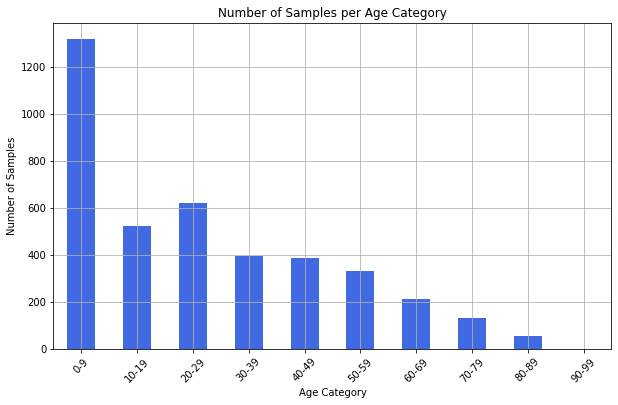

In [19]:
age_category_counts = sampled_RGB_data['Age_Category'].value_counts().sort_index()
# Plotting
plt.figure(figsize=(10, 6))  # Set the figure size for better readability
age_category_counts.plot(kind='bar', color='royalblue')
plt.title('Number of Samples per Age Category')
plt.xlabel('Age Category')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better visibility
plt.grid(True)  # Adds a grid for easier reading of values
plt.show()